# Amazon Review Classification with K-NN 

The purpose of this project was to create a machine learning model that would classify Amazon reviews by author. The [data set](https://archive.ics.uci.edu/ml/datasets/Amazon+Commerce+reviews+set) contained word frequency data from 1500 reviews (30 reviews from 50 authors). I also implemented a Term Frequency - Inverse Document Frequency (tf-idf) method on the data and reduced its dimensionality using PCA. $K$-Nearest Neighbor was the chosen method to classifiy the reviews.

## Data Preprocessing

I will first clean the data by removing null values. Then I will apply the tf-idf method and reduce the dimensionality of of the data using Principal Component Analysis.

In [489]:
import numpy as np
import pandas as pd 

In [490]:
raw = pd.read_csv('Amazon_initial_50_30_10000.csv') #imports the data
raw

,the,and,a,of,to,is,I,in,that,it,...,ra_,le_to,bra,uch_a,ave_a,n_in_,ied_,nd_b,rso,class.1
0,5,3,4,4,1,5,1,3,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12,3,6,2,3,4,2,0,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2,2,4,4,2,2,2,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18,4,6,5,4,2,1,0,4,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13,4,7,5,4,5,0,1,0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,15,11,5,9,10,0,5,6,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1496,12,7,7,5,5,3,3,2,1,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1497,8,10,2,4,2,0,2,3,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1498,11,12,10,7,8,4,4,7,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see that the data consists of common strings found in the reviews on the columns and the review numbers on the rows. Each entry contains the amount of times that particular string appears in the the review with null values occupying columns on the right.  

In [491]:
raw.dropna(axis=1, how='all', inplace=True) #drops all columns with strictly null values
raw

,the,and,a,of,to,is,I,in,that,it,...,t_wh,_tu,bein,'\'\'\'\'\'\'\'\'\'\'r\'\'\'\'\'\'\'\'\'\'\'',sma,er_p,nis,e_pe,_aft,'\'\'\'\'\'\'\'\'\'\'e.5
0,5,3,4,4,1,5,1,3,2,4,...,0,0,0,1,0,1,0,0,0,Agresti
1,12,3,6,2,3,4,2,0,1,3,...,0,0,5,0,1,0,0,0,0,Agresti
2,3,2,2,4,4,2,2,2,3,1,...,0,0,6,0,0,0,0,1,0,Agresti
3,18,4,6,5,4,2,1,0,4,3,...,0,0,0,0,0,0,0,0,0,Agresti
4,13,4,7,5,4,5,0,1,0,4,...,0,0,1,0,0,1,1,0,0,Agresti
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,15,11,5,9,10,0,5,6,1,3,...,0,0,0,0,0,1,0,2,0,Wilson
1496,12,7,7,5,5,3,3,2,1,5,...,0,0,0,0,0,0,0,0,0,Wilson
1497,8,10,2,4,2,0,2,3,1,1,...,0,0,0,0,0,0,0,0,0,Wilson
1498,11,12,10,7,8,4,4,7,2,2,...,0,0,0,0,0,0,0,1,2,Wilson


Now all the columns with strictly null values are gone and the authors of the reviews are stored in the rightmost column.

In [492]:
from sklearn import preprocessing as sklpp

authors = raw.iloc[:, -1] #creates a dataframe of the authors
label_encoder = sklpp.LabelEncoder()
authors = label_encoder.fit_transform(authors) #label encodes the authors with integers from 0 to 49.

freq = raw.iloc[:, :-1] #creates a dataframe with all the string frequencies

Now I'm going to remove columns containing "stop words" (commonly used words that will not help classify the review such as "a", "the", etc.)

In [493]:
import nltk

nltk.download('stopwords')
stop_words = stopwords.words('english') #imports a set of stop words from nltk

[nltk_data] Downloading package stopwords to C:\Users\Kyle
[nltk_data]     Aitken\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [494]:
#removes all stop word columns from dataset
for i in freq.columns:
    if i.lower() in stop_words:
        freq = freq.drop(i, axis=1)
freq

,book,one,like,also,well,good,get,time,would,use,...,ng_c,t_wh,_tu,bein,'\'\'\'\'\'\'\'\'\'\'r\'\'\'\'\'\'\'\'\'\'\'',sma,er_p,nis,e_pe,_aft
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,5,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,2,0,0,6,0,0,0,0,1,0
3,0,1,0,0,0,0,0,1,1,2,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,2,0
1496,0,2,0,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1497,1,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2


I am now going to implement the Term Frequency - Inverse Document Frequency method. This method is a very effective and commonly used term-weighting scheme. It refelects the importance of a particular word in classifying a document, while also accounting for the fact that some words appear frequently in general and therefore have less importance than words that appear in fewer documents in the corpus. 

In [495]:
#creating the term frequency dataframe - divides each value by the sum of the entries in its row
tf = (freq.T / freq.T.sum()).T

#creating the inverse document frequency dataframe
num_reviews = len(freq.index) #total number of reviews is 1500 in this case 
num_appearances = freq.gt(0).sum() #amount of documents in which each string appears
idf = np.log(num_reviews/num_appearances)

#creating the finalized tf-idf dataframe, ready for dimensionality reduction
tf_idf = tf*idf 
tf_idf

,book,one,like,also,well,good,get,time,would,use,...,ng_c,t_wh,_tu,bein,'\'\'\'\'\'\'\'\'\'\'r\'\'\'\'\'\'\'\'\'\'\'',sma,er_p,nis,e_pe,_aft
0,0.000000,0.000000,0.000000,0.000457,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000869,0.0,0.0,0.000000,0.000842,0.000000,0.000826,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000468,0.000000,0.000000,0.000546,...,0.000000,0.0,0.0,0.003836,0.000000,0.000693,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000549,...,0.001463,0.0,0.0,0.004629,0.000000,0.000000,0.000000,0.000000,0.000687,0.000000
3,0.000000,0.000148,0.000000,0.000000,0.0,0.000000,0.000000,0.000317,0.000332,0.000755,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000339,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000686,0.000000,0.000000,0.000618,0.000622,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.000000,0.000121,0.000000,0.000000,0.0,0.000000,0.000000,0.000259,0.000271,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000390,0.000000,0.000771,0.000000
1496,0.000000,0.000266,0.000000,0.000237,0.0,0.000272,0.000000,0.000000,0.000297,0.000000,...,0.000450,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1497,0.000421,0.000469,0.000414,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1498,0.000000,0.000136,0.000000,0.000243,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000434,0.000937


I am now going to do Principal Component Analysis on the tf-idf dataframe to reduce the amount of features that we are dealing with.  

In [496]:
from sklearn.decomposition import PCA

pca = PCA(n_components=.90) #this retains 90% of the information in the original tf-idf dataframe
pca.fit(tf_idf) #calculates the mean and variance of each column in the tf-idf dataframe
tf_idf = pca.transform(tf_idf) #manipulates data to have zero mean and unit variance
tf_idf = pd.DataFrame(tf_idf) #this is the finalized data, ready for K-NN
tf_idf

,0,1,2,3,4,5,6,7,8,9,...,920,921,922,923,924,925,926,927,928,929
0,0.001726,0.003226,-0.000967,0.005113,-0.000750,0.003573,0.001037,0.001115,-0.000455,0.002660,...,-0.000187,-0.000442,-0.000029,0.000417,-0.000445,-0.000276,-0.000037,0.000294,-0.000393,0.000142
1,0.001645,0.000984,-0.002423,0.001505,0.000374,0.002502,-0.000698,0.000895,-0.000034,-0.000115,...,0.000428,-0.000197,-0.000003,0.000272,-0.000207,0.000121,0.000320,0.000034,0.000351,0.000062
2,0.001877,0.000313,-0.000738,-0.000212,-0.001924,0.001987,-0.001326,-0.000901,0.001534,-0.000883,...,-0.000197,-0.000295,0.000250,0.000097,-0.000089,-0.000356,-0.000246,-0.000164,-0.000202,-0.000136
3,0.001443,0.001842,-0.001360,0.001100,-0.000801,0.001626,-0.000345,-0.002533,-0.000476,-0.000653,...,0.000032,-0.000004,0.000503,0.000078,0.000325,0.000288,0.000029,-0.000386,-0.000110,0.000406
4,0.002201,0.001353,-0.001331,0.002499,-0.000344,0.001647,-0.000639,0.000914,0.000291,-0.000481,...,-0.000509,0.000326,0.000647,0.000420,-0.000081,-0.000077,-0.000122,-0.000452,-0.000005,0.000470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-0.002213,-0.000279,-0.000280,-0.001842,-0.000835,0.001574,-0.000608,0.000030,0.000638,-0.001722,...,-0.000013,-0.000032,-0.000207,-0.000145,-0.000238,0.000269,0.000528,0.000139,-0.000572,-0.000276
1496,-0.000582,-0.000185,-0.001823,-0.000887,0.002027,0.000497,-0.001154,0.000235,-0.000723,0.001342,...,-0.000146,0.000600,0.000380,0.000124,0.000411,0.000146,0.000370,0.000591,-0.000294,0.000274
1497,-0.000673,-0.000679,-0.000577,-0.000063,-0.000768,0.000238,0.000893,-0.000313,0.000159,-0.000322,...,-0.000312,-0.000111,-0.000410,0.000612,0.000737,0.000155,-0.000167,0.000443,-0.000455,-0.000267
1498,-0.001963,-0.000216,0.000196,-0.001741,-0.000063,0.001347,-0.000196,0.000463,-0.001273,-0.001181,...,-0.000262,0.000126,0.000895,-0.000539,-0.000188,0.000164,-0.000227,0.000779,0.000226,-0.000388


We are now only dealing with must fewer features than 9755. This data is now sufficiently preprocessed. 

## $K$-$NN$ Classification

I will first split the data into into training and test data, with 30% of the data being used to test the learning method. Then I will determine the best choice of $K$ and implement the $K$-$NN$ method and visualize the data.

In [497]:
import time
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [498]:
from sklearn.model_selection import train_test_split

#splits the data into test and training data with 30% used for test.
X_train, X_test, y_train, y_test = train_test_split(tf_idf,authors,test_size=0.30)

I am now going to determine the best $K$ value for $K$-$NN$.

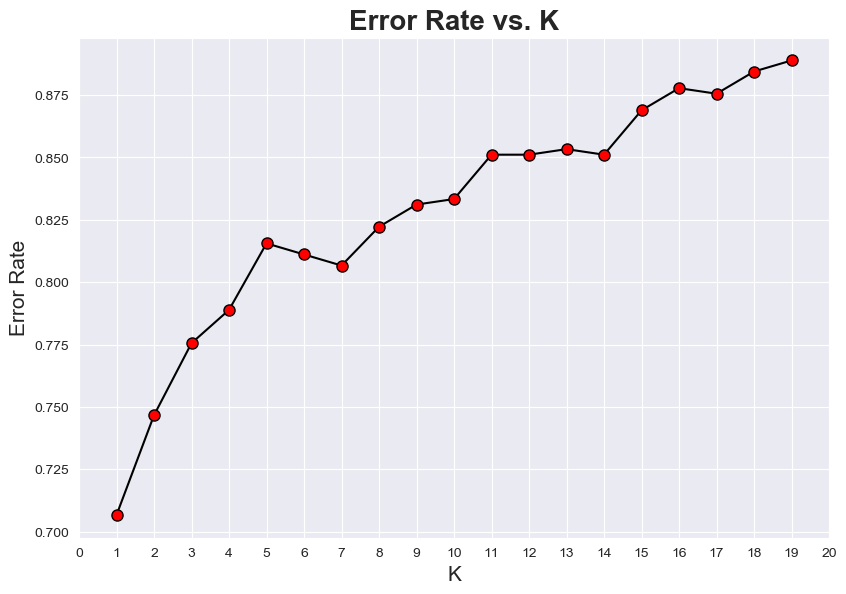

In [499]:
from sklearn.neighbors import KNeighborsClassifier

k_pick_start = time.process_time() #start time for picking K

error_rate = [] #creates empty array for future storage of error rates for K-NN with different K values. 

#calcuates the rate of misclassification for each K and stores it in the error_rate array
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test) #runs K-NN for K values ranging from 1 to 20.
    error_rate.append(np.mean(pred_i != y_test))   
    
fig = plt.figure(figsize=(7.5,5), dpi=100)

axes = fig.add_axes([.2,.2,1,1])

#plots the error_rate array
axes.plot(range(1,20), error_rate, color='black', marker='o', 
          markerfacecolor='red', markersize=8) 
axes.set_title('Error Rate vs. K',  fontsize=20, fontweight='bold')
axes.set_xlabel('K', fontsize=15)
axes.set_ylabel('Error Rate', fontsize=15)
axes.xaxis.set_ticks(np.arange(0, 21, 1))

plt.show(fig)

k_pick_end = time.process_time() #end time for picking K

This shows that the best choice of $K$ is 1 because it minimizes the rate of misclassification.

In [500]:
knn_start = time.process_time() #start time for K-NN method

knn = KNeighborsClassifier(n_neighbors=1) #choose K=1  
knn.fit(X_train,y_train) #runs the method on X_train and y_train
pred = knn.predict(X_test) #stores the predictions of the K-NN method

knn_end = time.process_time() #end time for K-NN method

Confusion Matrix Heatmap for K=1:


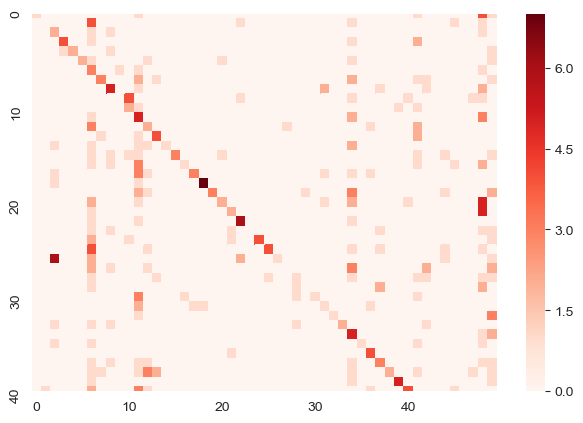

In [501]:
from sklearn.metrics import confusion_matrix, accuracy_score

print('Confusion Matrix Heatmap for K=1:')

fig2 = plt.figure(figsize=(7.5,5), dpi=100)
cm_heatmap = sns.heatmap(confusion_matrix(y_test,pred), xticklabels=10, yticklabels=10, cmap="Reds")

Here, I opted to display the confusion matrix as a heatmap because the original matrix is 50 by 50 and hard to interpret. This heatmap shows that the learning method was effective because the darker squares are almost exclusively on the diagonal which represents correct classifications. 

Furthermore, the squares not on the diagonal are primarily light reds, which shows that the model was not prone to specific misclassifications (i.e. frequently misclassifying author $x$ as author $y$ specifically).

In [502]:
print('K-NN classification Accuracy with K=1: ' 
      + str(round(accuracy_score(y_test, pred)*100,2))+ '%')

K-NN classification Accuracy with K=1: 29.33%


In [503]:
k_pick_runtime = k_pick_end - k_pick_start
knn_runtime = knn_end - knn_start

runtime = pd.DataFrame({'Runtime': [k_pick_runtime, knn_runtime]},
                        index=['Picking K', 'Running K-NN'])
runtime

,Runtime
Picking K,24.265625
Running K-NN,1.218750


## Conclusion

Overall, $K$-$NN$ was a good method to use on this dataset. The program was over 30 percent accurate, which is over 15 times more effective than standalone guessing which would only be 1/50=2 percent effective. The method of choosing $K$ was not excecptionally fast, but it was not unbareably slow either. If there were significantly more features in the dataset, $K$-$NN$ may not have been an appropriate technique. 

The effectiveness of this method outways its shortcomings in computing time. It would be interesting to compare the accuracies and runtimes of other classification techniques on this dataset. 

Another thing worth noting is that doing PCA on the dataset was very neccessary. Without PCA, picking $K$ took an unreasonanly long time and the classification accuracy was actually worse.